<a href="https://colab.research.google.com/github/SWeat-python-weekend-study/Yeongbeom_Song/blob/main/21030607.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import pandas as pd

df = pd.read_csv('trns_1day_series')
df.head() 

,SEND,RECV,APPROVAL,REJECT
0,4779,5045,4024,755
1,5103,5055,4196,907
2,5035,5073,4653,382
3,4757,4762,4530,227
4,4639,4664,4425,214


In [27]:
df.describe()

,SEND,RECV,APPROVAL,REJECT
count,1440.000000,1440.000000,1440.000000,1440.000000
mean,10274.082639,10274.831944,10062.034722,212.047917
std,6683.456958,6683.442065,6584.390468,135.078228
min,769.000000,769.000000,714.000000,16.000000
25%,3580.750000,3579.250000,3469.000000,84.000000
50%,11115.000000,11133.500000,10901.500000,210.500000
75%,15745.000000,15729.250000,15451.000000,305.000000
max,24859.000000,24911.000000,24565.000000,907.000000


In [28]:
len(df)

1440

In [29]:
pd.date_range('00:00', '23:59', freq='1min')

DatetimeIndex(['2021-03-08 00:00:00', '2021-03-08 00:01:00',
               '2021-03-08 00:02:00', '2021-03-08 00:03:00',
               '2021-03-08 00:04:00', '2021-03-08 00:05:00',
               '2021-03-08 00:06:00', '2021-03-08 00:07:00',
               '2021-03-08 00:08:00', '2021-03-08 00:09:00',
               ...
               '2021-03-08 23:50:00', '2021-03-08 23:51:00',
               '2021-03-08 23:52:00', '2021-03-08 23:53:00',
               '2021-03-08 23:54:00', '2021-03-08 23:55:00',
               '2021-03-08 23:56:00', '2021-03-08 23:57:00',
               '2021-03-08 23:58:00', '2021-03-08 23:59:00'],
              dtype='datetime64[ns]', length=1440, freq='T')

In [30]:
df['TIME'] = pd.date_range('00:00', '23:59', freq='1min')
df = df.set_index('TIME') # 인덱스로 지정

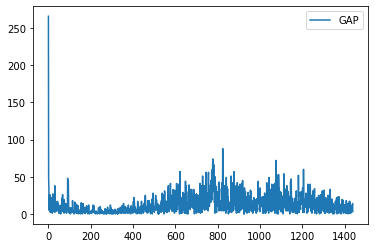

In [66]:
import numpy as np

df['GAP'] = np.abs ( df.SEND - df.RECV )
df.plot(y='GAP')

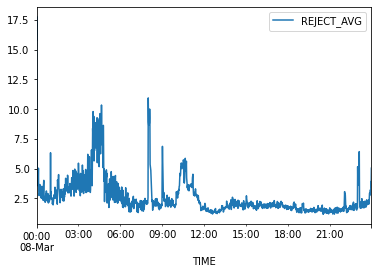

In [32]:
df['REJECT_AVG'] = df.REJECT / (df.APPROVAL + df.REJECT) * 100
df.plot(y='REJECT_AVG')

In [33]:
len(df)

1440

In [34]:
np.arange(0, len(df))

array([   0,    1,    2, ..., 1437, 1438, 1439])

In [35]:
np.array(df.APPROVAL)

array([4024, 4196, 4653, ..., 5006, 4935, 4940])

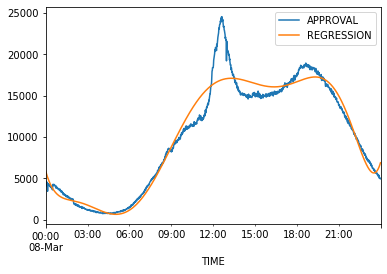

In [36]:
fp = np.polyfit( np.arange(0, len(df)), np.array(df.APPROVAL), 8) # 8차 다항식 계수 추출
fd = np.poly1d(fp) # 다항식 함수 생성
df['REGRESSION'] = fd( np.arange(0, len(df)) ) # 회귀분석 데이터
df.plot(y=['APPROVAL','REGRESSION']) # 승인거래, 회귀분석선 출력

In [37]:
((df.APPROVAL - df.REGRESSION) **2).sum() / 1440
((df.APPROVAL - df.REGRESSION) **2).mean()
mse = ((df.APPROVAL - df.REGRESSION) **2).mean()
rmse = np.sqrt(mse)
rmse, mse

(1513.0345444703341, 2289273.5327605517)

In [38]:
hh_list = np.array( df.APPROVAL ).reshape(24, 60)
hh_list.shape

(24, 60)

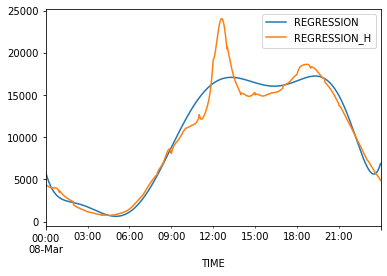

In [39]:
reg_list = []

for mm_list in hh_list: # 2차원 배열 리스트에 대한 배열 리스트 추출
  x = np.arange(0, 60) # [0,...,59] 60개짜리 X축 배열 생성
  y = mm_list # 60개짜리 실측값 Y축 배열 생성
  fp = np.polyfit(x, y, 4) # 4차 다항식 계수 연산
  fn = np.poly1d(fp) # 1차원 다항 함수 생성
  reg_list.append(fn(x)) # 다항함수에 의한 회귀분석 데이터 생성

df['REGRESSION_H'] = np.array(reg_list).flatten()
df.plot(y=['REGRESSION', 'REGRESSION_H'])

In [41]:
log_df = pd.read_csv('trns_msg_log', sep=':', dtype=str)
msg_df = pd.read_csv('trns_msg_info', dtype=str)
firm_df = pd.read_csv('trns_firm_info', dtype=str)
resp_df = pd.read_csv('trns_msg_resp_code_info', dtype=str)

In [42]:
tf1 = pd.merge(log_df, msg_df, on=['MSG_CODE'], how='left') # 전문번호 정보 병합
tf2 = pd.merge(tf1 , firm_df, on=['FIRM_CODE'], how='left') # 기관코드 정보 병합
tf3 = pd.merge(tf2 , resp_df, on=['RESP_CODE'], how='left') # 응답코드
tf3.loc[tf3.TRNS == '1', 'TRNS'] = 'SEND' # tf3.TRNS=='1'인 열들을 모두 선택 후 TRNS 칼럼 값으로 'SEND'
tf3.loc[tf3.TRNS == '2', 'TRNS'] = 'RECV'

tf3.head()

,TRNS,MSG_CODE,TIME,RESP_CODE,FIRM_CODE,SEQ,MSG_NAME,FIRM_NAME,RESP_NAME
0,SEND,0100,133000,,03,2e65c202e525e90e1d95,MS승인요청,IBK기업은행,NaN
1,SEND,0300,133000,,48,802407d045fa5d1a8287,IC승인 요청,새마을금고,NaN
2,SEND,0200,133000,,03,a1d3e524e4751b450a20,현금서비스 요청,IBK기업은행,NaN
3,SEND,0200,133000,,11,ed976e8de9708d167a64,현금서비스 요청,NH농협은행,NaN
4,SEND,9300,133000,,03,b7a878a4ff5d3076dd4b,기타승인 요청,IBK기업은행,NaN


In [60]:
# 로그 거래 원본 데이터에서 SEND와 RECV 기준으로 두 개 DataFrame으로 분리
send_df = log_df[log_df.TRNS=='1']
recv_df = log_df[log_df.TRNS =='2']

# 기관코드(FIRM_CODE)와 거래고유번호(SEQ)를 기준으로 병합
tf = pd.merge(send_df, recv_df, on=['FIRM_CODE', 'SEQ'], how='outer')
tf = tf [['SEQ', 'FIRM_CODE', 'MSG_CODE_x', 'TIME_x', 'TIME_y','RESP_CODE_y']]
tf = tf.rename(columns={'MSG_CODE_x':'MSG_CODE', 'TIME_x':'SEND_TIME', 'TIME_y':'RECV_TIME','RESP_CODE_y':'RESP_CODE'})
tf

,SEQ,FIRM_CODE,MSG_CODE,SEND_TIME,RECV_TIME,RESP_CODE
0,2e65c202e525e90e1d95,03,0100,133000,133005,01
1,802407d045fa5d1a8287,48,0300,133000,133001,01
2,a1d3e524e4751b450a20,03,0200,133000,133000,01
3,ed976e8de9708d167a64,11,0200,133000,133008,00
4,b7a878a4ff5d3076dd4b,03,9300,133000,133003,01
...,...,...,...,...,...,...
995,226c76440f927213fc35,03,0420,133059,133100,00
996,4a0813a414e8a43ae594,23,0420,133059,133103,00
997,f9951616122039cadea7,20,0420,133059,133108,00
998,917057d635b367f53749,72,0420,133059,133107,00


In [61]:
# 처리시간 계산
# SEND_TIME과 RECV_TIME은 문자열이므로 시간 GAP 계산을 위한 포멧 변환 필요
# pd.to_datetime 함수를 이용하면 쉽게 칼럼들에 대한 값을 datetime 객체들로 변환
tf['S_DATETIME'] = pd.to_datetime(tf.SEND_TIME, format='%H%M%S')
tf['R_DATETIME'] = pd.to_datetime(tf.RECV_TIME, format='%H%M%S')
tf['TIME_GAP'] = tf.R_DATETIME - tf.S_DATETIME

# 이제 불필요한 칼럼 제거
tf = tf.drop(['S_DATETIME','R_DATETIME'], axis=1)
tf

,SEQ,FIRM_CODE,MSG_CODE,SEND_TIME,RECV_TIME,RESP_CODE,TIME_GAP
0,2e65c202e525e90e1d95,03,0100,133000,133005,01,0 days 00:00:05
1,802407d045fa5d1a8287,48,0300,133000,133001,01,0 days 00:00:01
2,a1d3e524e4751b450a20,03,0200,133000,133000,01,0 days 00:00:00
3,ed976e8de9708d167a64,11,0200,133000,133008,00,0 days 00:00:08
4,b7a878a4ff5d3076dd4b,03,9300,133000,133003,01,0 days 00:00:03
...,...,...,...,...,...,...,...
995,226c76440f927213fc35,03,0420,133059,133100,00,0 days 00:00:01
996,4a0813a414e8a43ae594,23,0420,133059,133103,00,0 days 00:00:04
997,f9951616122039cadea7,20,0420,133059,133108,00,0 days 00:00:09
998,917057d635b367f53749,72,0420,133059,133107,00,0 days 00:00:08


In [62]:
# 초단위로 변경 및 합산을 위한 건수 지정
tf['SEC_GAP'] = tf['TIME_GAP'].dt.seconds
tf['COUNT'] = 1

tf

,SEQ,FIRM_CODE,MSG_CODE,SEND_TIME,RECV_TIME,RESP_CODE,TIME_GAP,SEC_GAP,COUNT
0,2e65c202e525e90e1d95,03,0100,133000,133005,01,0 days 00:00:05,5,1
1,802407d045fa5d1a8287,48,0300,133000,133001,01,0 days 00:00:01,1,1
2,a1d3e524e4751b450a20,03,0200,133000,133000,01,0 days 00:00:00,0,1
3,ed976e8de9708d167a64,11,0200,133000,133008,00,0 days 00:00:08,8,1
4,b7a878a4ff5d3076dd4b,03,9300,133000,133003,01,0 days 00:00:03,3,1
...,...,...,...,...,...,...,...,...,...
995,226c76440f927213fc35,03,0420,133059,133100,00,0 days 00:00:01,1,1
996,4a0813a414e8a43ae594,23,0420,133059,133103,00,0 days 00:00:04,4,1
997,f9951616122039cadea7,20,0420,133059,133108,00,0 days 00:00:09,9,1
998,917057d635b367f53749,72,0420,133059,133107,00,0 days 00:00:08,8,1


In [63]:
# 처리시간별 현황
tf.groupby('SEC_GAP').sum() # 처리시간 그룹 후 해당 그룹별 합계 (숫자로 지정된 항목인 COUNT만 수행)

,COUNT
SEC_GAP,
0,91
1,96
2,112
3,96
4,99
5,106
6,99
7,94
8,104


SEC_GAP
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
4    AxesSubplot(0.125,0.125;0.775x0.755)
5    AxesSubplot(0.125,0.125;0.775x0.755)
6    AxesSubplot(0.125,0.125;0.775x0.755)
7    AxesSubplot(0.125,0.125;0.775x0.755)
8    AxesSubplot(0.125,0.125;0.775x0.755)
9    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

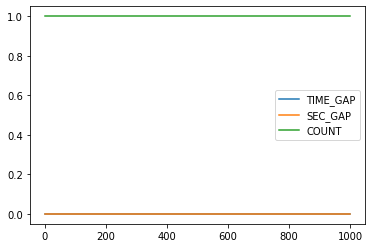

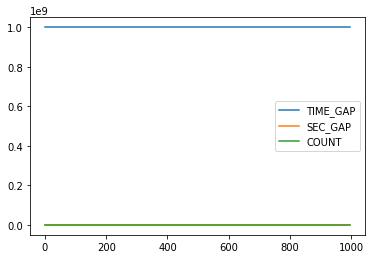

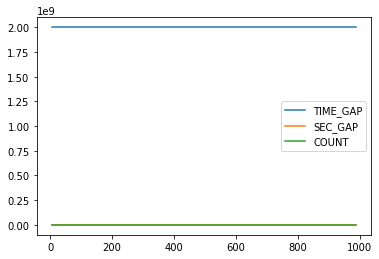

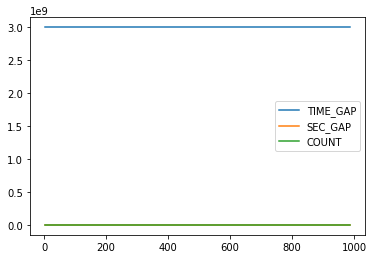

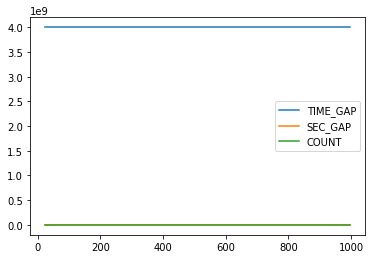

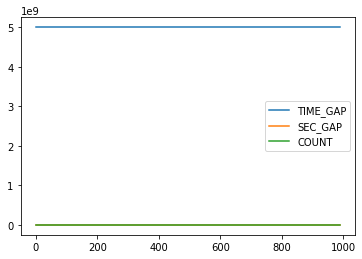

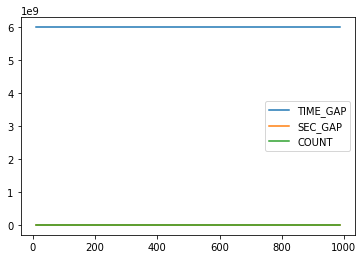

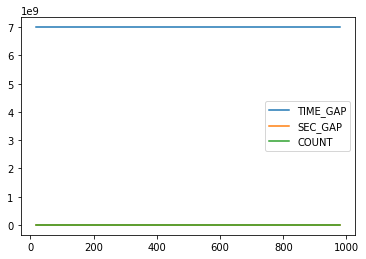

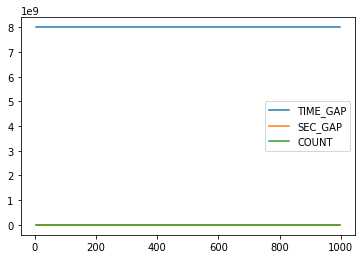

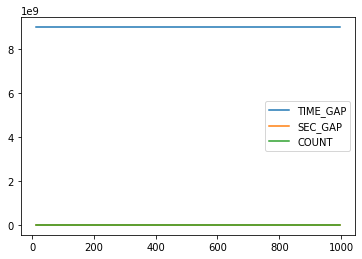

In [77]:
# 차트 출력
df = tf.groupby('SEC_GAP')
df.plot()

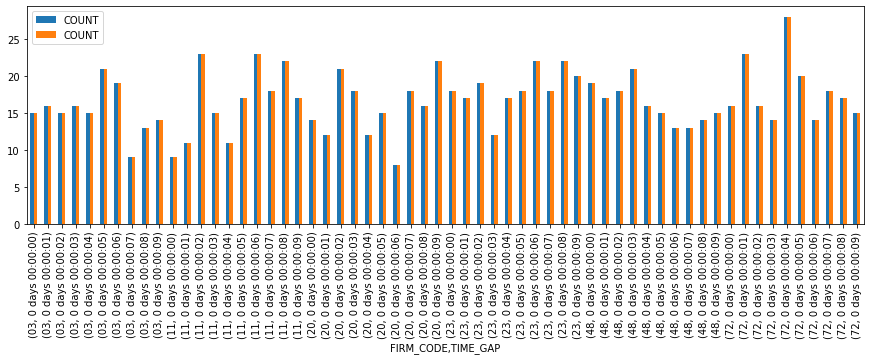

In [72]:
tf.groupby(['FIRM_CODE','TIME_GAP']).count()
tf.groupby(['FIRM_CODE','TIME_GAP']).count().rename(columns={'SEQ':'COUNT'})
tf.groupby(['FIRM_CODE','TIME_GAP']).count().rename(columns={'SEQ':'COUNT'}) [['COUNT']]
df = tf.groupby(['FIRM_CODE', 'TIME_GAP']).count().rename(columns={'SEQ':'COUNT'}) [['COUNT']]
df.plot(kind='bar', figsize=(15,4)) #bar 차트, 차트의 크기는 (15, 4)

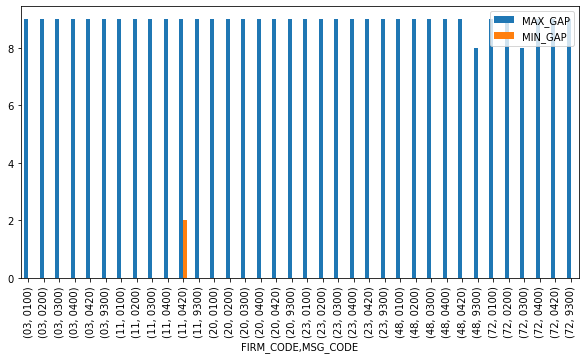

In [73]:
zf = tf[['FIRM_CODE','MSG_CODE','TIME_GAP']] # 3개 칼럼만 선택한 DataFrame 생성
max_df = zf.groupby(['FIRM_CODE','MSG_CODE']).max().rename(columns={'TIME_GAP':'MAX_GAP'})
min_df = zf.groupby(['FIRM_CODE','MSG_CODE']).min().rename(columns={'TIME_GAP':'MIN_GAP'})
max_df = max_df.reset_index() #그룹연산으로 지정된 index를 reset (merge를 위하여)
min_df = min_df.reset_index() #그룹연산으로 지정된 index를 reset
df = pd.merge(max_df, min_df)
df['MAX_GAP'] = df.MAX_GAP.dt.seconds # timedelta 객체를 seconds로 변환 (정수형 값)
df['MIN_GAP'] = df.MIN_GAP.dt.seconds # timedelta 객체를 seconds로 변환 (정수형 값)
df.set_index(['FIRM_CODE','MSG_CODE']).plot(kind='bar', figsize=(10,5))

In [118]:
import pandas as pd
from matplotlib import rcParams

rcParams['font.sans-serif'] = 'Malgun Gothic'
rcParams['font.weight']='regular'
rcParams['figure.figsize'] = 15,10

In [140]:
#인코딩은 UTF-8, 상단 2개 로우를 헤더로, 첫번째 컬럼을 인덱스로 지정
df = pd.read_csv('행정구역_시군구_별__성별_인구수_2011_2020', header=[0,1], index_col=0)
df.head()

행정구역(시군구)별    2011. 01              ...    2020. 05            
행정구역(시군구)별    총인구수 (명)   남자인구수 (명)  ...   남자인구수 (명)   여자인구수 (명)
전국          50,534,731  25,318,961  ...  25,856,030  25,985,341
서울특별시       10,312,835   5,110,837  ...   4,735,431   4,989,065
부산광역시        3,566,560   1,772,383  ...   1,670,175   1,736,767
대구광역시        2,512,071   1,255,238  ...   1,199,504   1,229,555
인천광역시        2,761,122   1,391,674  ...   1,478,307   1,471,756

[5 rows x 339 columns]

In [143]:
#멀티 컬럼들에 공백과 '(명)'문자를 제거가 필요
#컬럼을 출력함
for _ in df.columns:
  print(_)

('2011. 01', '총인구수 (명)')
('2011. 01', '남자인구수 (명)')
('2011. 01', '여자인구수 (명)')
('2011. 02', '총인구수 (명)')
('2011. 02', '남자인구수 (명)')
('2011. 02', '여자인구수 (명)')
('2011. 03', '총인구수 (명)')
('2011. 03', '남자인구수 (명)')
('2011. 03', '여자인구수 (명)')
('2011. 04', '총인구수 (명)')
('2011. 04', '남자인구수 (명)')
('2011. 04', '여자인구수 (명)')
('2011. 05', '총인구수 (명)')
('2011. 05', '남자인구수 (명)')
('2011. 05', '여자인구수 (명)')
('2011. 06', '총인구수 (명)')
('2011. 06', '남자인구수 (명)')
('2011. 06', '여자인구수 (명)')
('2011. 07', '총인구수 (명)')
('2011. 07', '남자인구수 (명)')
('2011. 07', '여자인구수 (명)')
('2011. 08', '총인구수 (명)')
('2011. 08', '남자인구수 (명)')
('2011. 08', '여자인구수 (명)')
('2011. 09', '총인구수 (명)')
('2011. 09', '남자인구수 (명)')
('2011. 09', '여자인구수 (명)')
('2011. 10', '총인구수 (명)')
('2011. 10', '남자인구수 (명)')
('2011. 10', '여자인구수 (명)')
('2011. 11', '총인구수 (명)')
('2011. 11', '남자인구수 (명)')
('2011. 11', '여자인구수 (명)')
('2011. 12', '총인구수 (명)')
('2011. 12', '남자인구수 (명)')
('2011. 12', '여자인구수 (명)')
('2012. 01', '총인구수 (명)')
('2012. 01', '남자인구수 (명)')
('2012. 01', '여자인구수 (명)')

In [144]:
#컬럼들에 존재하는 문자들은 모두 클린징하여 봄
for x in df.columns:
  print( [_.replace(' ','').replace('(명)','') for _ in x ] )

['2011.01', '총인구수']
['2011.01', '남자인구수']
['2011.01', '여자인구수']
['2011.02', '총인구수']
['2011.02', '남자인구수']
['2011.02', '여자인구수']
['2011.03', '총인구수']
['2011.03', '남자인구수']
['2011.03', '여자인구수']
['2011.04', '총인구수']
['2011.04', '남자인구수']
['2011.04', '여자인구수']
['2011.05', '총인구수']
['2011.05', '남자인구수']
['2011.05', '여자인구수']
['2011.06', '총인구수']
['2011.06', '남자인구수']
['2011.06', '여자인구수']
['2011.07', '총인구수']
['2011.07', '남자인구수']
['2011.07', '여자인구수']
['2011.08', '총인구수']
['2011.08', '남자인구수']
['2011.08', '여자인구수']
['2011.09', '총인구수']
['2011.09', '남자인구수']
['2011.09', '여자인구수']
['2011.10', '총인구수']
['2011.10', '남자인구수']
['2011.10', '여자인구수']
['2011.11', '총인구수']
['2011.11', '남자인구수']
['2011.11', '여자인구수']
['2011.12', '총인구수']
['2011.12', '남자인구수']
['2011.12', '여자인구수']
['2012.01', '총인구수']
['2012.01', '남자인구수']
['2012.01', '여자인구수']
['2012.02', '총인구수']
['2012.02', '남자인구수']
['2012.02', '여자인구수']
['2012.03', '총인구수']
['2012.03', '남자인구수']
['2012.03', '여자인구수']
['2012.04', '총인구수']
['2012.04', '남자인구수']
['2012.04', '여자인구수']
['2012.0

In [145]:
# df.rename( columns={ '옛이름':'신이름', ... } )에 사용될 딕셔너리 생성
colset = {}
for x in df.columns:
  y = [ _.replace(' ','').replace('(명)','') for _ in x ]
  colset[x] = tuple(y)
colset

{('2011. 01', '남자인구수 (명)'): ('2011.01', '남자인구수'),
 ('2011. 01', '여자인구수 (명)'): ('2011.01', '여자인구수'),
 ('2011. 01', '총인구수 (명)'): ('2011.01', '총인구수'),
 ('2011. 02', '남자인구수 (명)'): ('2011.02', '남자인구수'),
 ('2011. 02', '여자인구수 (명)'): ('2011.02', '여자인구수'),
 ('2011. 02', '총인구수 (명)'): ('2011.02', '총인구수'),
 ('2011. 03', '남자인구수 (명)'): ('2011.03', '남자인구수'),
 ('2011. 03', '여자인구수 (명)'): ('2011.03', '여자인구수'),
 ('2011. 03', '총인구수 (명)'): ('2011.03', '총인구수'),
 ('2011. 04', '남자인구수 (명)'): ('2011.04', '남자인구수'),
 ('2011. 04', '여자인구수 (명)'): ('2011.04', '여자인구수'),
 ('2011. 04', '총인구수 (명)'): ('2011.04', '총인구수'),
 ('2011. 05', '남자인구수 (명)'): ('2011.05', '남자인구수'),
 ('2011. 05', '여자인구수 (명)'): ('2011.05', '여자인구수'),
 ('2011. 05', '총인구수 (명)'): ('2011.05', '총인구수'),
 ('2011. 06', '남자인구수 (명)'): ('2011.06', '남자인구수'),
 ('2011. 06', '여자인구수 (명)'): ('2011.06', '여자인구수'),
 ('2011. 06', '총인구수 (명)'): ('2011.06', '총인구수'),
 ('2011. 07', '남자인구수 (명)'): ('2011.07', '남자인구수'),
 ('2011. 07', '여자인구수 (명)'): ('2011.07', '여자인구수'),
 ('2011. 07'

In [146]:
#데이터프레임의 Level 2의 멀티컬럼을 Level 1로 변경 (튜플 지정)
df.columns=df.columns.values

In [147]:
#컬럼명 변경
df = df.rename(columns=colset)
df.head()

,"(2011.01, 총인구수)","(2011.01, 남자인구수)","(2011.01, 여자인구수)","(2011.02, 총인구수)","(2011.02, 남자인구수)","(2011.02, 여자인구수)","(2011.03, 총인구수)","(2011.03, 남자인구수)","(2011.03, 여자인구수)","(2011.04, 총인구수)","(2011.04, 남자인구수)","(2011.04, 여자인구수)","(2011.05, 총인구수)","(2011.05, 남자인구수)","(2011.05, 여자인구수)","(2011.06, 총인구수)","(2011.06, 남자인구수)","(2011.06, 여자인구수)","(2011.07, 총인구수)","(2011.07, 남자인구수)","(2011.07, 여자인구수)","(2011.08, 총인구수)","(2011.08, 남자인구수)","(2011.08, 여자인구수)","(2011.09, 총인구수)","(2011.09, 남자인구수)","(2011.09, 여자인구수)","(2011.10, 총인구수)","(2011.10, 남자인구수)","(2011.10, 여자인구수)","(2011.11, 총인구수)","(2011.11, 남자인구수)","(2011.11, 여자인구수)","(2011.12, 총인구수)","(2011.12, 남자인구수)","(2011.12, 여자인구수)","(2012.01, 총인구수)","(2012.01, 남자인구수)","(2012.01, 여자인구수)","(2012.02, 총인구수)",...,"(2019.04, 여자인구수)","(2019.05, 총인구수)","(2019.05, 남자인구수)","(2019.05, 여자인구수)","(2019.06, 총인구수)","(2019.06, 남자인구수)","(2019.06, 여자인구수)","(2019.07, 총인구수)","(2019.07, 남자인구수)","(2019.07, 여자인구수)","(2019.08, 총인구수)","(2019.08, 남자인구수)","(2019.08, 여자인구수)","(2019.09, 총인구수)","(2019.09, 남자인구수)","(2019.09, 여자인구수)","(2019.10, 총인구수)","(2019.10, 남자인구수)","(2019.10, 여자인구수)","(2019.11, 총인구수)","(2019.11, 남자인구수)","(2019.11, 여자인구수)","(2019.12, 총인구수)","(2019.12, 남자인구수)","(2019.12, 여자인구수)","(2020.01, 총인구수)","(2020.01, 남자인구수)","(2020.01, 여자인구수)","(2020.02, 총인구수)","(2020.02, 남자인구수)","(2020.02, 여자인구수)","(2020.03, 총인구수)","(2020.03, 남자인구수)","(2020.03, 여자인구수)","(2020.04, 총인구수)","(2020.04, 남자인구수)","(2020.04, 여자인구수)","(2020.05, 총인구수)","(2020.05, 남자인구수)","(2020.05, 여자인구수)"
전국,"50,534,731","25,318,961","25,215,770","50,555,262","25,328,299","25,226,963","50,575,130","25,337,290","25,237,840","50,594,424","25,346,019","25,248,405","50,613,213","25,354,703","25,258,510","50,627,347","25,359,936","25,267,411","50,641,565","25,366,218","25,275,347","50,662,739","25,375,626","25,287,113","50,681,829","25,384,115","25,297,714","50,699,478","25,391,900","25,307,578","50,717,719","25,399,757","25,317,962","50,734,284","25,406,934","25,327,350","50,750,837","25,414,026","25,336,811","50,767,313",...,"25,969,036","51,840,339","25,868,330","25,972,009","51,842,636","25,868,406","25,974,230","51,845,612","25,868,638","25,976,974","51,847,538","25,868,377","25,979,161","51,849,253","25,868,023","25,981,230","51,850,705","25,867,179","25,983,526","51,851,427","25,866,604","25,984,823","51,849,861","25,864,816","25,985,045","51,847,509","25,862,863","25,984,646","51,844,627","25,860,491","25,984,136","51,843,195","25,858,743","25,984,452","51,842,524","25,857,509","25,985,015","51,841,371","25,856,030","25,985,341"
서울특별시,"10,312,835","5,110,837","5,201,998","10,314,245","5,110,818","5,203,427","10,307,783","5,107,011","5,200,772","10,301,829","5,103,919","5,197,910","10,295,643","5,100,399","5,195,244","10,288,284","5,095,751","5,192,533","10,282,472","5,092,201","5,190,271","10,277,507","5,089,493","5,188,014","10,271,880","5,086,210","5,185,670","10,266,174","5,082,622","5,183,552","10,257,741","5,078,105","5,179,636","10,249,679","5,073,899","5,175,780","10,250,134","5,073,567","5,176,567","10,251,297",...,"4,997,412","9,762,062","4,766,085","4,995,977","9,757,144","4,762,711","4,994,433","9,751,415","4,759,105","4,992,310","9,744,888","4,754,998","4,989,890","9,740,398","4,751,696","4,988,702","9,736,289","4,749,055","4,987,234","9,732,577","4,746,636","4,985,941","9,729,107","4,744,059","4,985,048","9,733,509","4,745,088","4,988,421","9,736,962","4,745,133","4,991,829","9,733,655","4,742,217","4,991,438","9,726,787","4,737,843","4,988,944","9,724,496","4,735,431","4,989,065"
부산광역시,"3,566,560","1,772,383","1,794,177","3,566,480","1,772,175","1,794,305","3,564,873","1,770,952","1,793,921","3,563,042","1,769,903","1,793,139","3,562,985","1,769,690","1,793,295","3,563,295","1,769,758","1,793,537","3,560,813","1,768,334","1,792,479","3,558,372","1,766,803","1,791,569","3,556,565","1,765,847","1,790,718","3,554,635","1,764,716","1,789,919","3,553,997","1,764,401","1,789,596","3,550,963","1,762,848","1,788,115","3,549,501","1,762,043","1,787,45

In [149]:
#튜플 기준으로 멀티 헤더의 인덱스로 변경함
df.columns=pd.MultiIndex.from_tuples(df.columns)
df

2011.01                          ...     2020.05                        
               총인구수       남자인구수       여자인구수  ...        총인구수       남자인구수       여자인구수
전국       50,534,731  25,318,961  25,215,770  ...  51,841,371  25,856,030  25,985,341
서울특별시    10,312,835   5,110,837   5,201,998  ...   9,724,496   4,735,431   4,989,065
부산광역시     3,566,560   1,772,383   1,794,177  ...   3,406,942   1,670,175   1,736,767
대구광역시     2,512,071   1,255,238   1,256,833  ...   2,429,059   1,199,504   1,229,555
인천광역시     2,761,122   1,391,674   1,369,448  ...   2,950,063   1,478,307   1,471,756
광주광역시     1,456,308     722,450     733,858  ...   1,455,533     720,300     735,233
대전광역시     1,504,617     754,111     750,506  ...   1,471,915     734,940     736,975
울산광역시     1,127,337     579,518     547,819  ...   1,143,148     587,434     555,714
세종특별자치시           -           -           -  ...     345,373     172,269     173,104
경기도      11,801,232   5,949,477   5,851,755  ...  13,324,041   6,703,603   6,620,438
강원도       1,528,790     769,339     759,451  ...   1,538,639     773,923     764,716
충청북도      1,550,474     781,774     768,700  ...   1,596,710     809,114     787,596
충청남도      2,076,239   1,049,848   1,026,391  ...   2,118,510   1,080,425   1,038,085
전라북도      1,868,745     931,489     937,256  ...   1,810,097     899,894     910,203
전라남도      1,916,912     957,989     958,923  ...   1,855,945     932,496     923,449
경상북도      2,688,586   1,350,687   1,337,899  ...   2,648,760   1,333,815   1,314,945
경상남도      3,291,435   1,656,488   1,634,947  ...   3,351,347   1,687,289   1,664,058
제주특별자치도     571,468     285,659     285,809  ...     670,793     337,111     333,682

[18 rows x 339 columns]

In [150]:
tf = df.T
tf

전국       서울특별시      부산광역시  ...       경상북도       경상남도  제주특별자치도
2011.01 총인구수   50,534,731  10,312,835  3,566,560  ...  2,688,586  3,291,435  571,468
        남자인구수  25,318,961   5,110,837  1,772,383  ...  1,350,687  1,656,488  285,659
        여자인구수  25,215,770   5,201,998  1,794,177  ...  1,337,899  1,634,947  285,809
2011.02 총인구수   50,555,262  10,314,245  3,566,480  ...  2,687,178  3,291,281  571,913
        남자인구수  25,328,299   5,110,818  1,772,175  ...  1,349,953  1,656,537  285,883
...                   ...         ...        ...  ...        ...        ...      ...
2020.04 남자인구수  25,857,509   4,737,843  1,671,199  ...  1,334,981  1,688,178  337,119
        여자인구수  25,985,015   4,988,944  1,737,148  ...  1,316,073  1,665,202  333,476
2020.05 총인구수   51,841,371   9,724,496  3,406,942  ...  2,648,760  3,351,347  670,793
        남자인구수  25,856,030   4,735,431  1,670,175  ...  1,333,815  1,687,289  337,111
        여자인구수  25,985,341   4,989,065  1,736,767  ...  1,314,945  1,664,058  333,682

[339 rows x 18 columns]

In [155]:
# unstack()을 통해 멀티 인덱스 한 개를 컬럼 차원으로 재그룹핑
tf = tf.unstack()
tf

2011.01                          ...     2020.05                        
              남자인구수       여자인구수        총인구수  ...       남자인구수       여자인구수        총인구수
전국       25,318,961  25,215,770  50,534,731  ...  25,856,030  25,985,341  51,841,371
서울특별시     5,110,837   5,201,998  10,312,835  ...   4,735,431   4,989,065   9,724,496
부산광역시     1,772,383   1,794,177   3,566,560  ...   1,670,175   1,736,767   3,406,942
대구광역시     1,255,238   1,256,833   2,512,071  ...   1,199,504   1,229,555   2,429,059
인천광역시     1,391,674   1,369,448   2,761,122  ...   1,478,307   1,471,756   2,950,063
광주광역시       722,450     733,858   1,456,308  ...     720,300     735,233   1,455,533
대전광역시       754,111     750,506   1,504,617  ...     734,940     736,975   1,471,915
울산광역시       579,518     547,819   1,127,337  ...     587,434     555,714   1,143,148
세종특별자치시           -           -           -  ...     172,269     173,104     345,373
경기도       5,949,477   5,851,755  11,801,232  ...   6,703,603   6,620,438  13,324,041
강원도         769,339     759,451   1,528,790  ...     773,923     764,716   1,538,639
충청북도        781,774     768,700   1,550,474  ...     809,114     787,596   1,596,710
충청남도      1,049,848   1,026,391   2,076,239  ...   1,080,425   1,038,085   2,118,510
전라북도        931,489     937,256   1,868,745  ...     899,894     910,203   1,810,097
전라남도        957,989     958,923   1,916,912  ...     932,496     923,449   1,855,945
경상북도      1,350,687   1,337,899   2,688,586  ...   1,333,815   1,314,945   2,648,760
경상남도      1,656,488   1,634,947   3,291,435  ...   1,687,289   1,664,058   3,351,347
제주특별자치도     285,659     285,809     571,468  ...     337,111     333,682     670,793

[18 rows x 339 columns]

In [157]:
# 인덱스가 X축이 되며, 나머지 값들이 Y축이 되어 출력됨
tf.plot()

TypeError: ignored

In [158]:
# 서울특별시로 한정하여 출력
tf['서울특별시'].plot()

KeyError: ignored

In [159]:
# 세종특별자치시로 한정하여 출력
tf['세종특별자치시'].plot()

KeyError: ignored

In [126]:
df = pd.read_csv('covid19_patient')
df.head()

,id,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,1.0,female,1984.0,China,filtered at airport,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released
1,2.0,male,1964.0,Korea,filtered at airport,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released
2,3.0,male,1966.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released
3,4.0,male,1964.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released
4,5.0,male,1987.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaN,released


In [127]:
df['count'] = 1 # 집계를 위한 카운트 값 할당
df.columns

Index(['id', 'sex', 'birth_year', 'country', 'region', 'group',
       'infection_reason', 'infection_order', 'infected_by', 'contact_number',
       'confirmed_date', 'released_date', 'deceased_date', 'state', 'count'],
      dtype='object')

In [129]:
df.country.unique()

array(['China', 'Korea', nan, 'Mongolia'], dtype=object)

In [130]:
# 그룹연산사를 이용한 카운트
df.groupby('country').count()[['id']]

,id
country,
China,8
Korea,6274
Mongolia,1


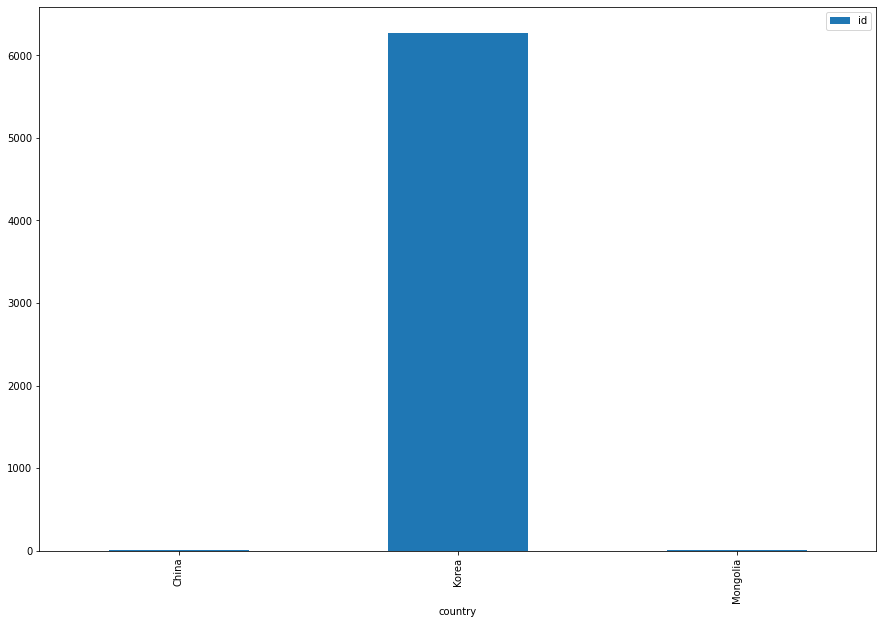

In [132]:
# Bar 차트로 확인
df.groupby('country').count()[['id']].plot(kind='bar')

In [134]:
df.groupby('infection_reason').sum()[['count']]

,count
infection_reason,
visit to China,1
contact with patient,75
contact with patient in Japan,1
contact with patient in Singapore,2
pilgrimage to Israel,6
residence in Wuhan,2
visit to Cheongdo Daenam Hospital,1
visit to China,1
visit to Daegu,43


In [136]:
#확진자 기준 집계 생성
rf = df.groupby('confirmed_date').sum()
#사망자 집계
rf ['dead'] = df.groupby('deceased_date').sum()[['count']]
rf = rf [['count', 'dead', 'contact_number']]
#확진자 누적
rf['total_dead'] = rf['dead'].cumsum()
#사망자 누적
rf['total_count'] = rf['count'].cumsum()
#접촉자 누적
rf['total_contact'] = rf['contact_number'].cumsum()

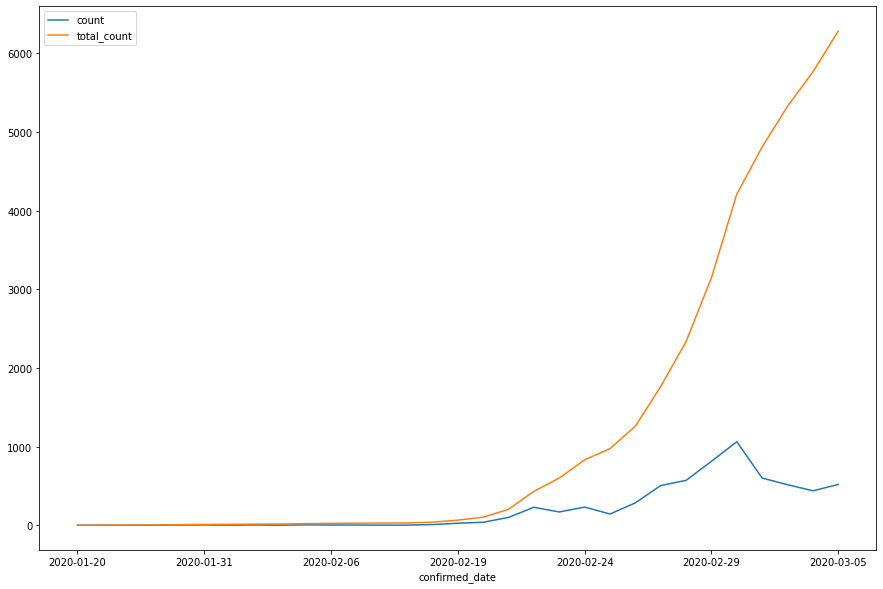

In [137]:
rf[['count','total_count']].plot()

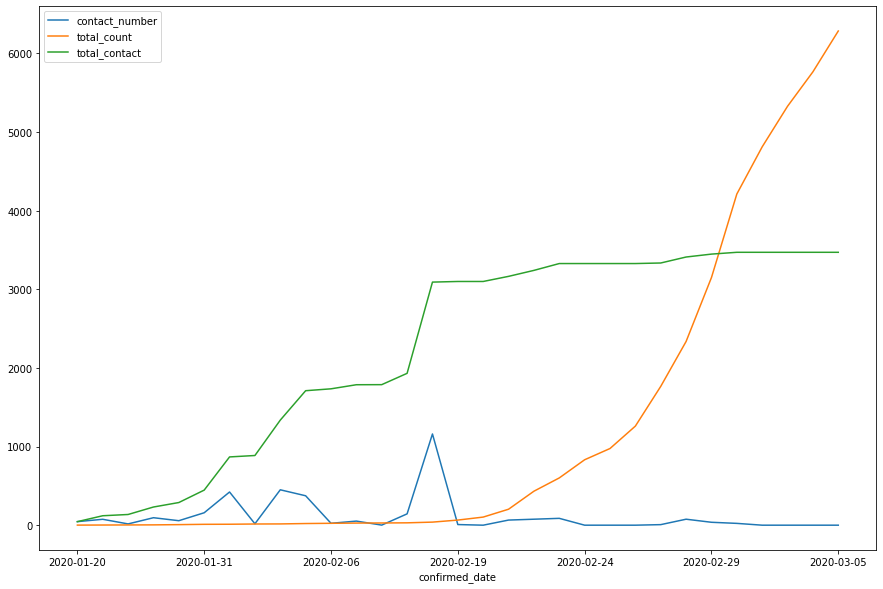

In [138]:
rf[['contact_number','total_count', 'total_contact']].plot()